In [ ]:
#Import Dependencies
from citipy import citipy
from config import gkey
from pprint import pprint
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [ ]:
#Randomly generate latitude and longitude numbers. lookup nearest city using citipy

# Empty series to hold all the names of cities and countries
random_City = []
loopcnt = 0
citylist = []
#Loop through until at least 500 unique city names are found
while len(random_City) < 500 :
    # Loop counter to track number of loops made
    loopcnt +=1
    
    # Randomly generate latitude
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    #print(f"The lattitude is: {lat}") 
    
    # Randomly generate longitude
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    #print(f"The longitude is: {lng}") 
    
    # Call citipy file to get nearest city based on random lat and lng
    city = citipy.nearest_city(lat, lng)
    
    # Test to see if the random city is already in the list, if not, add it to the city and country lists
    foundCity = False
    for j in range(len(random_City)):
        if city.city_name == random_City[j]:
            foundCity = True
    if foundCity==False  :
        random_City.append(city.city_name)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code.upper()
        citdict['lat'] = lat
        citdict['long'] = lng 
        citylist.append(citdict)

In [4]:
print(len(citylist))

500


In [5]:

#Create dataframe.
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [6]:
samplecity

,city,country
26,jamestown,SH
88,mangai,CD
195,libourne,FR
275,avarua,CK
11,lavrentiya,RU
281,ballina,AU
374,gaurnadi,BD
371,talnakh,RU
482,athni,IN
184,wulanhaote,CN


In [7]:
print(citylist)

[{'city': 'dikson', 'country': 'RU', 'lat': 74.0023528440245, 'long': 81.00641085941898}, {'city': 'upernavik', 'country': 'GL', 'lat': 76.0043756753506, 'long': -55.003745014047205}, {'city': 'busselton', 'country': 'AU', 'lat': -86.00309398708752, 'long': 75.00351463763708}, {'city': 'lolua', 'country': 'TV', 'lat': -9.009125787314474, 'long': 172.00407868261587}, {'city': 'saint george', 'country': 'BM', 'lat': 28.003730021572558, 'long': -57.00386665086234}, {'city': 'victoria', 'country': 'SC', 'lat': -7.002507702406517, 'long': 56.00682482627628}, {'city': 'bengkulu', 'country': 'ID', 'lat': -18.002811314423933, 'long': 89.0047645875221}, {'city': 'barentsburg', 'country': 'SJ', 'lat': 84.00464659850279, 'long': 12.00245695342653}, {'city': 'nizhneyansk', 'country': 'RU', 'lat': 86.0078070914931, 'long': 141.00016491009262}, {'city': 'severo-kurilsk', 'country': 'RU', 'lat': 39.001914541996705, 'long': 160.00049858373205}, {'city': 'port alfred', 'country': 'ZA', 'lat': -37.00371

In [8]:

# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = gkey
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=


In [9]:

# Loop through the list of cities and perform request for data on each
search_data = []
city_List = []
country_List = []
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""
searchCnt = 0

print("Begin API Call to OpenWeather Database ")
for index,row in samplecity.iterrows():
    searchCnt += 1
    query_url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    print(query_url)
    try:
        city_weather = requests.get(query_url).json()
        samplecity.set_value(index, "latitude", int(city_weather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(city_weather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(city_weather['main']['temp']))
        samplecity.set_value(index, "humidity", int(city_weather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(city_weather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(city_weather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {searchCnt}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")    

Begin API Call to OpenWeather Database 
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=jamestown


C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vaish\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: set_value is deprecated and will be removed in a future rele

This is city#: 1
This is: jamestown
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=jamestown
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=mangai
No data for this city: mangai
This is city#: 2
This is: mangai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=mangai
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=libourne
This is city#: 3
This is: libourne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=libourne
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=avarua
This is city#: 4
This is: avarua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63d

This is city#: 28
This is: chernyshevskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=namibe
This is city#: 29
This is: namibe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=namibe
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=muisne
No data for this city: muisne
This is city#: 30
This is: muisne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=muisne
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=ayan
No data for this city: ayan
This is city#: 31
This is: ayan
This is the requested URL: http://api.openweathermap.

This is city#: 56
This is: skagen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=skagen
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kawardha
This is city#: 57
This is: kawardha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kawardha
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=bluff
This is city#: 58
This is: bluff
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=bluff
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=hobart
This is city#: 59
This is: hobart
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=i

This is city#: 84
This is: zhezkazgan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=zhezkazgan
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=butaritari
This is city#: 85
This is: butaritari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=butaritari
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kavieng
This is city#: 86
This is: kavieng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kavieng
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=karratha
This is city#: 87
This is: karratha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96

This is city#: 113
This is: poirino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=poirino
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port alfred
This is city#: 114
This is: port alfred
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port alfred
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=gornja koprivna
This is city#: 115
This is: gornja koprivna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=gornja koprivna
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=mys shmidta
No data for this city: mys shmidta
This is city#: 116
This is: mys shmidta
This is the requested URL: htt

This is city#: 141
This is: fortuna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=fortuna
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=sarangani
This is city#: 142
This is: sarangani
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=sarangani
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=ambilobe
This is city#: 143
This is: ambilobe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=wajir
This is city#: 144
This is: wajir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b

This is city#: 170
This is: davila
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=davila
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=nuuk
This is city#: 171
This is: nuuk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=nuuk
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=hearst
This is city#: 172
This is: hearst
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=hearst
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=mataura
This is city#: 173
This is: mataura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=impe

This is city#: 199
This is: tonneins
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=tonneins
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=surt
This is city#: 200
This is: surt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=surt
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=arman
This is city#: 201
This is: arman
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=arman
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=vao
This is city#: 202
This is: vao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=

This is city#: 228
This is: jaru
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=jaru
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=arkhipo-osipovka
This is city#: 229
This is: arkhipo-osipovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=arkhipo-osipovka
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=khatanga
This is city#: 230
This is: khatanga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=khatanga
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kitob
This is city#: 231
This is: kitob
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3a

This is city#: 257
This is: ancud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=ancud
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=margate
This is city#: 258
This is: margate
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=margate
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=komsomolskiy
This is city#: 259
This is: komsomolskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=lazarev
This is city#: 260
This is: lazarev
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c5

This is city#: 285
This is: firminy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=firminy
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=tasiilaq
This is city#: 286
This is: tasiilaq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=menzelinsk
This is city#: 287
This is: menzelinsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=menzelinsk
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=plastun
This is city#: 288
This is: plastun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c

This is city#: 314
This is: halifax
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=halifax
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=leh
This is city#: 315
This is: leh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=leh
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=sentyabrskiy
No data for this city: sentyabrskiy
This is city#: 316
This is: sentyabrskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=alihe
This is city#: 317
This is: alihe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?

This is city#: 342
This is: port elizabeth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=saint-pierre
This is city#: 343
This is: saint-pierre
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port macquarie
This is city#: 344
This is: port macquarie
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=saleaula
No data for this city: saleaula
This is city#: 345
This is: saleaula
This is the requested URL

This is city#: 371
This is: longyearbyen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port blair
This is city#: 372
This is: port blair
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=port blair
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=baykit
This is city#: 373
This is: baykit
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=baykit
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=pathein
This is city#: 374
This is: pathein
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1

This is city#: 399
This is: kamaishi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=buariki
No data for this city: buariki
This is city#: 400
This is: buariki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=buariki
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kathmandu
This is city#: 401
This is: kathmandu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=kathmandu
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=auki
This is city#: 402
This is: auki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?ap

This is city#: 427
This is: winnemucca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=winnemucca
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=amderma
No data for this city: amderma
This is city#: 428
This is: amderma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=amderma
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=dwarka
This is city#: 429
This is: dwarka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=dwarka
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=temirtau
This is city#: 430
This is: temirtau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 455
This is: noyabrsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=noyabrsk
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=clyde river
This is city#: 456
This is: clyde river
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=clyde river
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=verkhnyaya inta
This is city#: 457
This is: verkhnyaya inta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=vilhena
This is city#: 458
This is: vilhena
This is the requested URL: http://api.openweathermap.org/data/2.5/weath

This is city#: 483
This is: damietta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=damietta
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=miyako
This is city#: 484
This is: miyako
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=miyako
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=nanortalik
This is city#: 485
This is: nanortalik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c595c91b157ea726&units=imperial&q=enkoping
This is city#: 486
This is: enkoping
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7e63dfd3aecf1c96c59

In [10]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
26,jamestown,SH,-33,-33,77,31,12,2
195,libourne,FR,44,44,52,81,0,5
275,avarua,CK,-21,-21,78,83,75,3
482,athni,IN,16,16,92,43,0,3
391,zachary,US,30,30,64,93,90,4
149,goderich,SL,43,43,40,99,92,9
446,pacific grove,US,36,36,51,87,1,4
425,vanavara,RU,60,60,24,74,80,6
23,albany,AU,42,42,38,86,90,9
396,chernyshevskiy,RU,63,63,26,59,24,5


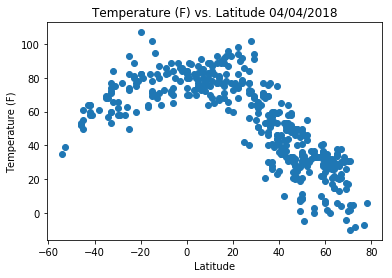

In [11]:
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

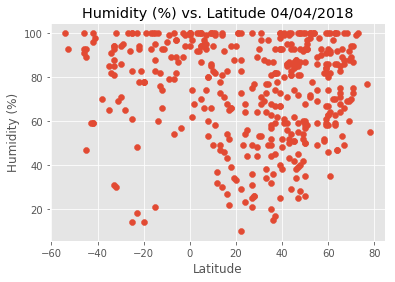

In [12]:
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

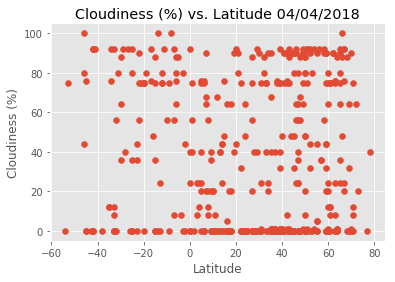

In [13]:
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

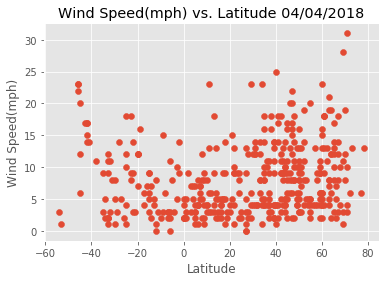

In [14]:
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [15]:
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,jamestown,SH,-33,-33,77,31,12,2
1,libourne,FR,44,44,52,81,0,5
2,avarua,CK,-21,-21,78,83,75,3
3,athni,IN,16,16,92,43,0,3
4,zachary,US,30,30,64,93,90,4
